In [1]:
import pandas as pd

In [5]:
data = pd.read_csv("illiteracy.txt", delimiter="\t")
data.head()

,Country,Illit,Births
0,Albania,20.5,1.78
1,Algeria,39.1,2.44
2,Bahrain,15.0,2.34
3,Belize,5.9,2.97
4,Benin,73.5,5.60


In [6]:
data[['Illit', 'Births']].corr()

,Illit,Births
Illit,1.000000,0.768663
Births,0.768663,1.000000


In [7]:
data[['Illit', 'Births']].corr(method='spearman')

,Illit,Births
Illit,1.000000,0.752962
Births,0.752962,1.000000


In [38]:
data = pd.read_csv("water_1.txt", delimiter="\t")
data.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


In [39]:
data.shape

(61, 4)

In [40]:
data[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [41]:
data[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [42]:
south = data[data.location == 'South']
north = data[data.location == 'North']
south[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [13]:
north[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [14]:
import math

In [19]:
a = 718.0
b = 203.0
c = 515.0
d = 239.0
mcc = (a*d - b*c)/math.sqrt((a+b)*(a+c)*(b+d)*(c+d))
mcc

0.10900237458678963

In [17]:
from scipy import stats
import numpy as np

In [21]:
stats.chi2_contingency(np.array([[a, b], [c, d]]))

(19.407530788543038,
 1.0558987006638725e-05,
 1L,
 array([[ 677.96597015,  243.03402985],
        [ 555.03402985,  198.96597015]]))

In [45]:
def proportions_confint_diff_ind(sample1, sample2, alpha = 0.05):    
    z = stats.norm.ppf(1 - alpha / 2.)   
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

In [46]:
mens = [0]*515 + [1]*239
womens = [0]*718 + [1]*203
proportions_confint_diff_ind(mens, womens)

(0.053905233215813156, 0.13922183141523897)

In [30]:
stats.ttest_ind(mens, womens)

Ttest_indResult(statistic=4.4851752624634438, pvalue=7.7813933614254305e-06)

In [31]:
def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

In [34]:
def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - stats.norm.cdf(z_stat)

In [35]:
proportions_diff_z_test(proportions_diff_z_stat_ind(mens, womens))

8.1534530895766011e-06

In [36]:
table = np.array([[197, 111, 33], [382, 685, 331], [110, 342, 333]])
stats.chi2_contingency(table)

(293.68311039689746,
 2.4964299580093467e-62,
 4L,
 array([[  93.08597464,  153.74722662,   94.16679873],
        [ 381.6251981 ,  630.318542  ,  386.0562599 ],
        [ 214.28882726,  353.93423138,  216.77694136]]))

In [37]:
n = sum([sum(x) for x in table])
phi_cramera = np.sqrt(293.68311039689746 / (n * 2))
phi_cramera

0.2412013934500338

## Multiple cheking quiz.

In [3]:
from scipy import stats
import pandas as pd

In [4]:
aucs = pd.read_csv("AUCs.txt", delimiter="\t")
aucs.head()

,Name,C4.5,C4.5+m,C4.5+cf,C4.5+m+cf
0,adult (sample),0.763,0.768,0.771,0.798
1,breast cancer,0.599,0.591,0.590,0.569
2,breast cancer wisconsin,0.954,0.971,0.968,0.967
3,cmc,0.628,0.661,0.654,0.657
4,ionosphere,0.882,0.888,0.886,0.898


In [13]:
p_vals = []
for x, i in zip(aucs.columns[1:4], range(2, 5)):
    for y in aucs.columns[i:]:
        p_vals.append(stats.wilcoxon(aucs[x], aucs[y])[1])
        print x, ' -> ', y, ' p: ', p_vals[-1]
        

C4.5  ->  C4.5+m  p:  0.0107571331198
C4.5  ->  C4.5+cf  p:  0.861262330095
C4.5  ->  C4.5+m+cf  p:  0.0159064441017
C4.5+m  ->  C4.5+cf  p:  0.0463327297934
C4.5+m  ->  C4.5+m+cf  p:  0.327825675845
C4.5+cf  ->  C4.5+m+cf  p:  0.0229090993544


In [15]:
from statsmodels.sandbox.stats.multicomp import multipletests
import numpy as np

In [16]:
reject, p_corrected, a1, a2 = multipletests(np.array(p_vals), alpha = 0.05, method = 'holm')
print reject, p_corrected, a1, a2

[False False False False False False] [ 0.0645428   0.86126233  0.07953222  0.13899819  0.65565135  0.0916364 ] 0.00851244461085 0.00833333333333


In [17]:
reject, p_corrected, a1, a2 = multipletests(np.array(p_vals), alpha = 0.05, method = 'fdr_bh')
print reject, p_corrected, a1, a2

[ True False  True False False  True] [ 0.0458182   0.86126233  0.0458182   0.06949909  0.39339081  0.0458182 ] 0.00851244461085 0.00833333333333


## Regression test

In [87]:
data = pd.read_csv("botswana.tsv", delimiter="\t")
data.head()

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,evermarr,agefm,heduc,urban,electric,radio,tv,bicycle
0,0,18,10,catholic,4.0,1.0,1.0,0,NaN,NaN,1,1.0,1.0,1.0,1.0
1,2,43,11,protestant,2.0,1.0,1.0,1,20.0,14.0,1,1.0,1.0,1.0,1.0
2,0,49,4,spirit,4.0,1.0,0.0,1,22.0,1.0,1,1.0,1.0,0.0,0.0
3,0,24,12,other,2.0,1.0,0.0,0,NaN,NaN,1,1.0,1.0,1.0,1.0
4,3,32,13,other,3.0,1.0,1.0,1,24.0,12.0,1,1.0,1.0,1.0,1.0


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4361 entries, 0 to 4360
Data columns (total 15 columns):
ceb         4361 non-null int64
age         4361 non-null int64
educ        4361 non-null int64
religion    4361 non-null object
idlnchld    4241 non-null float64
knowmeth    4354 non-null float64
usemeth     4290 non-null float64
evermarr    4361 non-null int64
agefm       2079 non-null float64
heduc       1956 non-null float64
urban       4361 non-null int64
electric    4358 non-null float64
radio       4359 non-null float64
tv          4359 non-null float64
bicycle     4358 non-null float64
dtypes: float64(9), int64(5), object(1)
memory usage: 511.1+ KB


In [83]:
data.religion.value_counts()

spirit        1841
other         1080
protestant     993
catholic       447
Name: religion, dtype: int64

In [84]:
dropped = data.dropna()
dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1834 entries, 1 to 4360
Data columns (total 15 columns):
ceb         1834 non-null int64
age         1834 non-null int64
educ        1834 non-null int64
religion    1834 non-null object
idlnchld    1834 non-null float64
knowmeth    1834 non-null float64
usemeth     1834 non-null float64
evermarr    1834 non-null int64
agefm       1834 non-null float64
heduc       1834 non-null float64
urban       1834 non-null int64
electric    1834 non-null float64
radio       1834 non-null float64
tv          1834 non-null float64
bicycle     1834 non-null float64
dtypes: float64(9), int64(5), object(1)
memory usage: 229.2+ KB


In [88]:
data['nevermarr'] = data.agefm.apply(lambda x: 0 if x == x else 1)
data.agefm.fillna(0, inplace=True)
data.drop('evermarr', axis=1, inplace=True)

In [91]:
heducnan = data[data.nevermarr == 1].heduc.fillna(-1)
data.heduc.fillna(heducnan, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4361 entries, 0 to 4360
Data columns (total 15 columns):
ceb          4361 non-null int64
age          4361 non-null int64
educ         4361 non-null int64
religion     4361 non-null object
idlnchld     4241 non-null float64
knowmeth     4354 non-null float64
usemeth      4290 non-null float64
agefm        4361 non-null float64
heduc        4238 non-null float64
urban        4361 non-null int64
electric     4358 non-null float64
radio        4359 non-null float64
tv           4359 non-null float64
bicycle      4358 non-null float64
nevermarr    4361 non-null int64
dtypes: float64(9), int64(5), object(1)
memory usage: 511.1+ KB


In [92]:
data.shape[0] - data.heduc.count()

123

In [102]:
filled = data.copy()

filled['heduc_noans'] = filled.heduc.apply(lambda x: 0 if x == x else 1)
filled['idlnchld_noans'] = filled.idlnchld.apply(lambda x: 0 if x == x else 1)
filled['usemeth_noans'] = filled.usemeth.apply(lambda x: 0 if x == x else 1)

filled.heduc.fillna(-2, inplace=True)
filled.idlnchld.fillna(-1, inplace=True)
filled.usemeth.fillna(-1, inplace=True)
filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4361 entries, 0 to 4360
Data columns (total 18 columns):
ceb               4361 non-null int64
age               4361 non-null int64
educ              4361 non-null int64
religion          4361 non-null object
idlnchld          4361 non-null float64
knowmeth          4354 non-null float64
usemeth           4361 non-null float64
agefm             4361 non-null float64
heduc             4361 non-null float64
urban             4361 non-null int64
electric          4358 non-null float64
radio             4359 non-null float64
tv                4359 non-null float64
bicycle           4358 non-null float64
nevermarr         4361 non-null int64
heduc_noans       4361 non-null int64
idlnchld_noans    4361 non-null int64
usemeth_noans     4361 non-null int64
dtypes: float64(9), int64(8), object(1)
memory usage: 613.3+ KB


In [103]:
filled['heduc_noans'].value_counts()

0    4238
1     123
Name: heduc_noans, dtype: int64

In [104]:
filled.dropna(inplace=True)
filled.shape[0] * filled.shape[1]

78264

In [1]:
import statsmodels.formula.api as smf

In [96]:
m1 = smf.ols('ceb ~ age + educ + religion + idlnchld + knowmeth + usemeth + agefm + heduc + urban + electric +'\
                    ' radio + tv + bicycle + nevermarr + heduc_noans + idlnchld_noans + usemeth_noans', data=filled)
fitted = m1.fit()
print fitted.summary()

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     412.5
Date:                Sat, 25 Jun 2016   Prob (F-statistic):               0.00
Time:                        12:27:35   Log-Likelihood:                -7732.1
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4328   BIC:                         1.563e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Intercept                 -1

In [13]:
import statsmodels.stats.api as sms
import numpy as np

In [97]:
print 'Breusch-Pagan test: p=%f' % sms.het_breushpagan(fitted.resid, fitted.model.exog)[1]

Breusch-Pagan test: p=0.000000


In [98]:
m2 = smf.ols('ceb ~ age + educ + religion + idlnchld + knowmeth + usemeth + agefm + heduc + urban + electric +'\
                    ' radio + tv + bicycle + nevermarr + heduc_noans + idlnchld_noans + usemeth_noans', data=filled)
fitted = m2.fit(cov_type='HC1')
print fitted.summary()

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     345.0
Date:                Sat, 25 Jun 2016   Prob (F-statistic):               0.00
Time:                        12:27:48   Log-Likelihood:                -7732.1
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4328   BIC:                         1.563e+04
Df Model:                          19                                         
Covariance Type:                  HC1                                         
                             coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Intercept                 -1

In [99]:
filled = filled.drop(['religion', 'radio', 'tv'], axis=1)

In [100]:
m3 = smf.ols('ceb ~ age + educ + idlnchld + knowmeth + usemeth + agefm + heduc + urban + electric +'\
                    ' bicycle + nevermarr + heduc_noans + idlnchld_noans + usemeth_noans', data=filled)
fitted = m3.fit()

print 'Breusch-Pagan test: p=%f' % sms.het_breushpagan(fitted.resid, fitted.model.exog)[1]

Breusch-Pagan test: p=0.000000


In [101]:
m4 = smf.ols('ceb ~ age + educ + idlnchld + knowmeth + usemeth + agefm + heduc + urban + electric +'\
                    ' bicycle + nevermarr + heduc_noans + idlnchld_noans + usemeth_noans', data=filled)
fitted = m4.fit(cov_type='HC1')
print fitted.summary()

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     463.4
Date:                Sat, 25 Jun 2016   Prob (F-statistic):               0.00
Time:                        12:27:57   Log-Likelihood:                -7734.5
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4333   BIC:                         1.559e+04
Df Model:                          14                                         
Covariance Type:                  HC1                                         
                     coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept         -1.0698      0.258     -4.

In [60]:
print "F=%f, p=%f, k1=%f" % m2.fit().compare_f_test(m4.fit())

F=0.919236, p=0.467231, k1=5.000000


In [61]:
filled = filled.drop(['usemeth_noans', 'usemeth'], axis=1)

In [66]:
m5 = smf.ols('ceb ~ age + educ + idlnchld + knowmeth + agefm + heduc + urban + electric +'\
                    ' bicycle + nevermarr + heduc_noans + idlnchld_noans', data=filled)
fitted = m5.fit(cov_type='HC1')
print fitted.summary()

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     396.4
Date:                Sat, 25 Jun 2016   Prob (F-statistic):               0.00
Time:                        10:43:53   Log-Likelihood:                -7825.7
No. Observations:                4348   AIC:                         1.568e+04
Df Residuals:                    4335   BIC:                         1.576e+04
Df Model:                          12                                         
Covariance Type:                  HC1                                         
                     coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept         -1.1931      0.262     -4.

In [67]:
m4.fit().compare_f_test(m5.fit())

(92.890582301097609, 3.1552009480386492e-40, 2.0)

In [71]:
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


(0, 20)

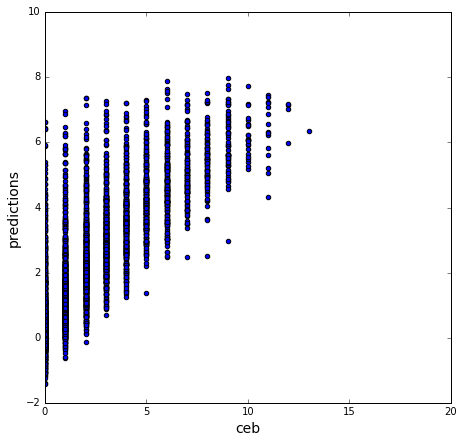

In [73]:
plt.figure(figsize(16,7))
plt.subplot(121)
scatter(filled['ceb'], fitted.fittedvalues)
plt.xlabel('ceb', fontsize=14)
plt.ylabel('predictions', fontsize=14)
plt.xlim([0,20])